<a href="https://colab.research.google.com/github/Fran-Genna/Advanced-analytics-project/blob/main/AdvancedAnalytics_%26_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Analytics and Machine Learning Project

First of all, we need to import a set of core libraries.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

To use Google Drive with Colab, it must be mounted using the following command.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the **supermarket sales** dataset, already present in the Drive.
Entering the location where it is saved, so it can be imported into the work environment:

In [11]:
regression_raw_dataset = pd.read_csv('/content/drive/MyDrive/Progetto_Advanced_Analytics/supermarket_sales.csv', encoding='windows-1254')

# Dataset exploration

**View of  the dataset in tabular form** in order to have a more intuitive representation and better understand the type of data.

In [13]:
regression_raw_dataset.head(100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
96,766-85-7061,B,Mandalay,Normal,Male,Health and beauty,87.87,10,43.9350,922.6350,3/29/2019,10:25,Ewallet,878.70,4.761905,43.9350,5.1
97,871-39-9221,C,Naypyitaw,Normal,Female,Electronic accessories,12.45,6,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,4.761905,3.7350,4.1
98,865-92-6136,A,Yangon,Normal,Male,Food and beverages,52.75,3,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,4.761905,7.9125,9.3


Main metadata of the dataset columns

In [14]:
regression_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

There are no null values; however, some other values are categorical and therefore a strategy will be needed to encode them.
Some columns are not very useful for the purpose of prediction analysis and should simply be removed, such as the invoice ID, the sale date, the time, and a couple of others

In [15]:
regression_dataset = regression_raw_dataset.drop(columns=['Invoice ID', 'Tax 5%', 'Total', 'Date', 'Time', 'cogs', 'gross margin percentage'])

In [16]:
regression_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   object 
 1   City           1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Payment        1000 non-null   object 
 8   gross income   1000 non-null   float64
 9   Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


# Mean, median, mode, and standard deviation

**Calculate using numpy the mean, median and mode of the column on which to make the predictions (the label), i.e. Rating**. For the purposes of the project, the Rating column acquires a different meaning than the original one in the dataset: it gives a rating to the transaction based on its profitability and therefore tells how profitable it was for the supermarket chain.
This will give a first idea of ​​the summary of the ratings assigned to the various orders:

In [17]:
# code to calculate the mean, median and mode of the "Rating" label
mean = np.mean(regression_dataset['Rating'])
median = np.median(regression_dataset['Rating'])

#For the mode, use Scipy's Stats mod
from scipy import stats

mode = stats.mode(regression_dataset['Rating'])
mode_frecuency = mode.count

print("Mean: " + str(mean))
print("Median: " + str(median))
print(f"Mode: {mode.mode}, with a frecuency of {mode_frecuency} times.")

Mean: 6.9727
Median: 7.0
Mode: 6.0, with a frecuency of 26 times.


In [18]:
regression_dataset["Rating"].describe() # Describe() method on the Rating column to check the correctness of the average

,Rating
count,1000.00000
mean,6.97270
std,1.71858
min,4.00000
25%,5.50000
50%,7.00000
75%,8.50000
max,10.00000


In [19]:
int(regression_dataset['Rating'].value_counts()[6.0]) #To check the mode, use the value_counts, and convert to integer

26

**Standard deviation** is a very important measure of "sparsity" of the data, and it is a very useful piece of information to obtain on the label.

Calculating the std_dev using Numpy:

In [20]:
std_dev = np.std(regression_dataset["Rating"])
print("Stardard deviation: " + str(std_dev))

Stardard deviation: 1.7177207893019182


# How are the label values ​​distributed?

At this point let's see how the data is graphically distributed:

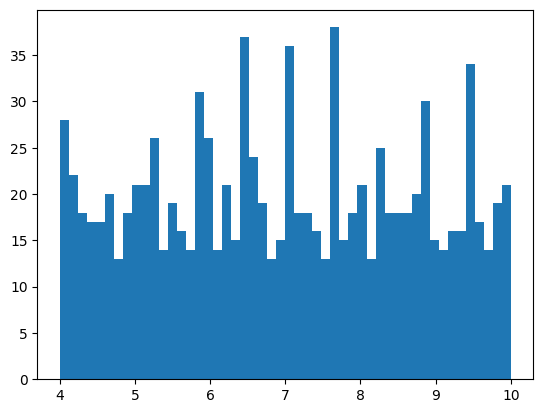

In [21]:
plt.hist(regression_dataset['Rating'], 50)
plt.show()

The distribution of ratings is more or less uniform and there is no skewness.
Now, disribution of gross income

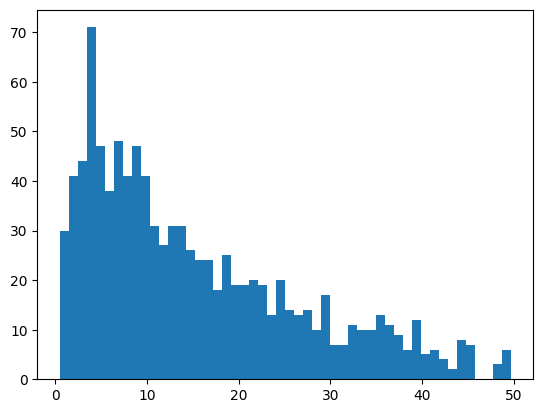

In [22]:
plt.hist(regression_dataset['gross income'], 50)
plt.show()

For gross income, the distribution is different

there is a lot of skewness here and the majority of orders seem to have a low gross income.
So what is the value of this skewness exactly?

In [23]:
'''The distribution shows the right tail (positive skewness).

The skewness value will be > 0.

To know the exact value of the skew, import the Scipy skew function, and apply it to the 'gross income' column.

'''
from scipy.stats import skew
value_skew = skew(regression_dataset["gross income"])
print("Skewness: " + str(value_skew))

Skewness: 0.8912303920037635


# Encoding of categorical variables

There are some variables (such as "Branch", "City", "Customer type", "Gender", "Product line" and "Payment") that are not numeric and therefore cannot be directly processed by the algorithms that will be used later.


In [24]:
'''To change categorical values ​​to numeric values, use OneHotEncoder.
OneHotEncoder Parameters:
- Sparse_output=False : It is used to return the output as a dense array, with values ​​0 and 1, useful for easily visualizing and analyzing data.
- Handle_unknown='ignore' : allows to handle categories not seen during training without generating errors, which is useful in production or testing.
- Set_output(transform='pandas') : get a DataFrame, integrating better with Pandas based workflows.'''

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

ohe_rd = ohe.fit_transform(regression_dataset[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']])
ohe_rd

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [25]:
#For training machine learning models, the original categorical columns will no longer be needed.
#Merge the two datasets and remove the columns transformed via OneHotEncoder

regression_dataset = pd.concat([regression_dataset, ohe_rd], axis=1).drop(columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'])

In [26]:
regression_dataset

,Unit price,Quantity,gross income,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,9.1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,15.28,5,3.8200,9.6,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,46.33,7,16.2155,7.4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,58.22,8,23.2880,8.4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,86.31,7,30.2085,5.3,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,6.2,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,97.38,10,48.6900,4.4,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,31.84,1,1.5920,7.7,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,65.82,1,3.2910,4.1,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Feature Scaling

In the dataset there are some features that could be standardized/normalized: the most obvious ones are surely the price of the single object, that is "Unit price", and "gross income" which, as seen before, has a big skewness. This should improve the performance of the models, so let's proceed with the **standardization**:

In [27]:
# code to standardize the "Unit price" and "gross income" columns

#Import StandardScaler from sklearn.preprocessing, and apply it to the 2 columns"

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

regression_dataset[['Unit price', 'gross income']] = scaler.fit_transform(regression_dataset[['Unit price', 'gross income']])
regression_dataset

,Unit price,Quantity,gross income,Rating,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0.718160,7,0.919607,9.1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.525303,5,-0.987730,9.6,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.352781,7,0.071446,7.4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.096214,8,0.675780,8.4,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.156959,7,1.267125,5.3,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.578600,1,-1.141750,6.2,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,1.574989,10,2.846340,4.4,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,-0.899958,1,-1.178109,7.7,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.383208,1,-1.032932,4.1,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


# Train e Test Split

It is therefore time to tackle the last phase before training a machine learning model: **the split between training and test set**!
Use a ratio of 80:20, which most of the time works well.

The train features, test features, train label and test labels will be called respectively with the names *X_train*, *X_test*, *y_train* and *y_test*:

In [28]:
from sklearn.model_selection import train_test_split

# code to split the dataset into training set and test set

#Separate the dataset into X and y, i.e. dependent (input) and independent (target) variables
X = regression_dataset.drop('Rating', axis=1)
y = regression_dataset['Rating']

# Division into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# View test and test sizes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (800, 22)
X_test: (200, 22)
y_train: (800,)
y_test: (200,)


# Linear Regression

Now it is time to predict **Ratings** using the simplest model, namely linear regression.
the model will be called *regressor*.

In [29]:
# Model training with linear regression

# Import of the library
from sklearn.linear_model import LinearRegression

#Model initialization and training on x and y train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Test set predictions
y_pred = regressor.predict(X_test)
y_pred

array([6.87720767, 6.91425076, 7.19939676, 7.41461794, 7.41409142,
       6.58895957, 6.77741622, 7.03348936, 7.23717615, 6.79344008,
       7.4599675 , 6.92504971, 6.98510612, 6.89948225, 6.6070782 ,
       6.56977477, 6.88348472, 6.86666877, 7.2013476 , 7.03164681,
       7.14137184, 7.20934148, 7.14769939, 7.0165588 , 6.68030305,
       6.60059229, 7.35020313, 6.66823298, 7.11284339, 6.93843245,
       6.84415048, 7.1505959 , 7.1945615 , 7.10243112, 6.92558812,
       6.70420005, 6.91448183, 6.7173298 , 6.92286564, 6.9967698 ,
       6.88649396, 7.16957938, 6.88495617, 6.91344793, 7.48454308,
       7.1808551 , 7.25647282, 6.92051532, 6.91286121, 7.05120577,
       7.41449259, 7.28887652, 6.8226234 , 7.17761194, 6.474793  ,
       6.80068634, 7.05657263, 7.22573867, 6.90896069, 6.60771817,
       6.63762179, 6.60951737, 7.10798324, 6.89730493, 6.72824672,
       7.08519757, 7.22173101, 7.16402008, 6.87816274, 7.03894687,
       6.94253785, 6.70054949, 7.21338275, 6.84645711, 6.33266

Now that the training has taken place it is time to evaluate how it performs.
The metrics we take into consideration, which are the main ones for linear regression, are **the mean squared error and the mean absolute error**.
Calculate them using sklearn, calling them *MSE* and *MAE* respectively.
Aim to make them as close to zero as possible, because the model is better the more these are zero:

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 2.9279355571031083 
MAE = 1.4631871769222726


# Polynomial Regression

In this section we will work in a similar way to what was done for linear regression, but using polynomial regression, which is certainly more powerful than the first.

As before, call the model *regressor* and the object related to the polynomial features *poly_regressor*:

In [31]:
# Model training with polynomial regression

#Import the library and initialize the model.
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=2)

# Let's transform X_train and X_test
X_train_poly = poly_regressor.fit_transform(X_train)
X_test_poly = poly_regressor.transform(X_test)

#Apply the regressor (defined in the previous code) on the new Train values ​​and run the prediction
regressor.fit(X_train_poly, y_train)
y_pred = regressor.predict(X_test_poly)


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculating metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.3356882483805506 
MAE = 1.5583308736684114


Linear regression has lower MSE and MAE than polynomial regression, indicating better accuracy in predictions. A lower Mean Squared Error (MSE) and Mean Absolute Error (MAE) mean the predicted values are closer to the actual data.

# Logistic Regression

In this section, we change the dataset, as the nature of the problem changes: we move to a classification problem, in which you will evaluate the quality of some apples destined for the supermarket chain to decide which are the best quality apples.

The first thing to do is to import the new dataset, namely apple_quality, which will be called *classification_dataset*:

In [54]:
classification_dataset = pd.read_csv("/content/drive/MyDrive/Progetto_Advanced_Analytics/apple_quality.csv")

In [55]:
classification_dataset.head(50)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [56]:
# Remove records containing null values ​​from the dataset
classification_dataset = classification_dataset.dropna()

In [57]:
classification_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


The dataset is already clean and almost all columns are numeric. The only one that is not is the label, which needs to be encoded:

In [58]:
'''The label 'quality' is the target, it contains two categorical values, good and bad.
Given these characteristics of the label, use the LabelEncoder method'''

from sklearn.preprocessing import LabelEncoder

#Creating LabelEncoder instance
label_encoder = LabelEncoder()

# Applying encoding to the 'Quality' column
classification_dataset['Encoded_quality'] = label_encoder.fit_transform(classification_dataset['Quality'])

In [59]:
print(classification_dataset[['Quality', 'Encoded_quality']].head())

  Quality  Encoded_quality
0    good                1
1    good                1
2     bad                0
3    good                1
4    good                1


In [51]:
classification_dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Encoded_quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good,1
...,...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good,1
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good,1


We must then re-perform the division between the training portion and the test portion, using the nomenclature seen previously:

In [60]:
# Separate the features (X) and the target (y)
X = classification_dataset.drop(columns = ['Encoded_quality', 'Quality'])  # Droppare le colonne target
y = classification_dataset['Encoded_quality']

# Splitting training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  # 80% train, 20% test

# Print the dimensions of the train and test set
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3200, 8)
X_test: (800, 8)
y_train: (3200,)
y_test: (800,)


Use logistic regression to train the actual model, which will be called *logistic_regressor*:

In [61]:
# code to train the model using logistic regression
from sklearn.linear_model import LogisticRegression

logistic_regressor = LogisticRegression(max_iter=300) #Create 300 interactions to find the optimal parameters during the optimization process

logistic_regressor.fit(X_train, y_train)

LogisticRegression(max_iter=300)

A metric that allows for an immediately evaluate the goodness of the model is the ***F1 score***, which should ideally be higher than 0.80.
 It’s also important to maximize the average of precision and recall, which should also ideally be higher than 0.80:

In [62]:
from sklearn.metrics import classification_report

y_predict_test = logistic_regressor.predict(X_test)

print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       409
           1       0.73      0.81      0.77       391

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.77      0.76      0.76       800



Draw the **confusion matrix**, which shows the categories where your model performs well and where it doesn't. This can provide additional insights for improving the model.

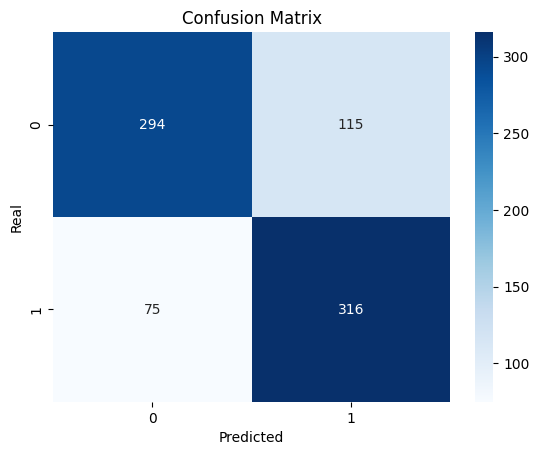

In [63]:
#import seaborn and pyplot to visualize the confusion matrix as a heatmap.
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_predict_test)

# Visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

**Using a decision tree to see if it can improve the performance of the logistic regression based model.** Decision trees are generally more powerful

The procedure is not dissimilar to those used previously

In [64]:
# Training of the decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialization and Training
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [65]:
# Test data prediction and metrics evaluation
y_pred_test = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       409
           1       0.82      0.85      0.83       391

    accuracy                           0.83       800
   macro avg       0.84      0.84      0.83       800
weighted avg       0.84      0.83      0.84       800



Construction of the confusion matrix:

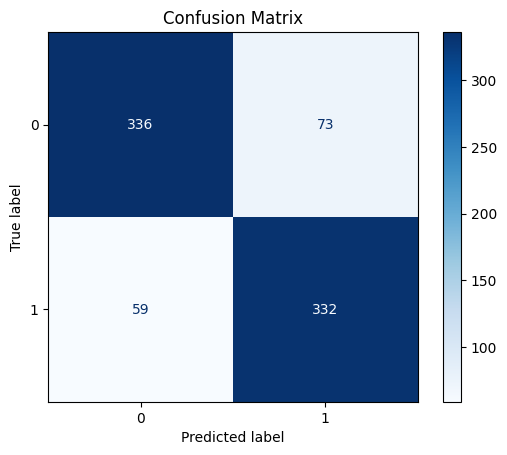

In [66]:
# confusion matrix of decision tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediction
y_pred_test = decision_tree.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


How many errors are there? More or less than those made by the logistic regression model?

From the analysis of the evaluation metrics (precision, recall and F1-score) it results that **The Decision Tree model shows superior performance**, with values ​​of these indicators exceeding the 0.80 threshold.
Furthermore, the confusion matrix shows a significantly lower number of errors, suggesting a greater effectiveness of the Decision Tree model compared to logistic regression.  
n particular, the “match” values ​​(i.e., correct classifications) are higher than the errors, indicating a better predictive ability of the Decision Tree model.

What are the features that were most important for the decision tree?
Using feature importance.

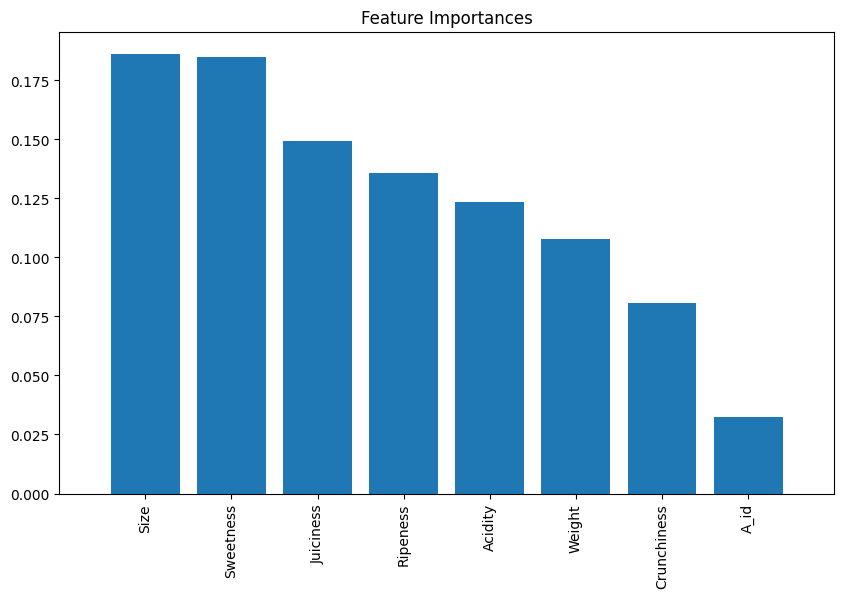

In [67]:
#code for feature importance

import matplotlib.pyplot as plt

# Calculate the importance of features
importances = decision_tree.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# View the most important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# K-Means Clustering

First of all, remove the label, because K-Means Clustering is an unsupervised algorithm and therefore should not have it:

In [68]:
clustering_dataset = classification_dataset.drop(columns=['Quality'])
clustering_dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Encoded_quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1


Train the model using the algorithm in question.
The procedure is always similar to what we saw previously.

Try to set the number of clusters to two first (since the dataset contains good or bad apples):

In [69]:
# code to train the model with K-Means Clustering
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Columns of interest
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Feature scaling
scaler = StandardScaler()
clustering_dataset_scaled = scaler.fit_transform(clustering_dataset[features])

# Initialization and training of the KMeans model
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(clustering_dataset_scaled)

# Cluster Prediction
labels = kmeans.labels_

# Adding clusters to the original dataset
clustering_dataset['Cluster'] = labels

# Final Output: All Features + Cluster
clustering_dataset = clustering_dataset[features + ['Encoded_quality', 'Cluster']]

# Viewing the final DataFrame
clustering_dataset.head(30)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Encoded_quality,Cluster
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,0,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,1,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,1,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,0,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,0,0


Then make a prediction and see what quality the apple in the input to the model corresponds to:

In [70]:
# code to make a prediction on an apple with any characteristics
# Example: first apple
apple_input = np.array([[-3.970049,	-2.512336,	5.346330,	-1.012009,	1.844900,	0.329840,	-0.491590483]])

# Cluster Prediction
cluster_pred = kmeans.predict(apple_input)


print(f"Cluster assigned: {cluster_pred[0]}")
if cluster_pred[0] == 0:
    print("Probably apple Not good.")
else:
    print("Probably a good apple.")

Cluster assigned: 1
Probably a good apple.


What if we instead try to set the number of clusters to three? Let's test this scenario and redo the prediction, maybe you might find that there are actually some apples of intermediate quality.

In [71]:
# Columns of interest
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

# Feature Scaling
scaler = StandardScaler()
clustering_dataset_scaled = scaler.fit_transform(clustering_dataset[features])

# Initialization and training of KMeans model for 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(clustering_dataset_scaled)

# Cluster Prediction
labels = kmeans.labels_

# Adding clusters to the original dataset
clustering_dataset['Cluster'] = labels

# Final output: All features + Cluster + Encoded_quality
clustering_dataset = clustering_dataset[features + ['Encoded_quality', 'Cluster']]

# Visualization the final DataFrame
clustering_dataset.head(30)

<ipython-input-71-53fa8f033782>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_dataset['Cluster'] = labels


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Encoded_quality,Cluster
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1,2
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1,2
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,0,2
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,1,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,1,2
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,0,2
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,0,0


In [72]:
# Testing the model on three apples, from the second to the fourth
mele_input = np.array([
    [	-1.195217,	-2.839257,	3.664059,	1.588232,	0.853286,	0.867530,	-0.722809367],
    [-0.292024,	-1.351282,	-1.738429,	-0.342616,	2.838636,	-0.038033,	2.621636473],
    [	-0.657196,	-2.271627,	1.324874,	-0.097875,	3.637970,	-3.413761,	0.790723217	]
])

# Cluster Prediction for All Apples
predizioni_cluster = kmeans.predict(mele_input)

# Interpretation for each apple
for i, cluster in enumerate(predizioni_cluster, 1):
    print(f"Apple {i}: Cluster assigned -> {cluster}")
    if cluster == 0:
        print(" → Probably Apple Not Good.")
    elif cluster == 1:
        print(" → Probable intermediate quality apple")
    else:
        print(" → Probably Good Apple.")
    print()

Apple 1: Cluster assigned -> 2
 → Probably Good Apple.

Apple 2: Cluster assigned -> 1
 → Probable intermediate quality apple

Apple 3: Cluster assigned -> 1
 → Probable intermediate quality apple



# Time Series

The final topic of the project is time series: the dataset used for the regression is actually a time series from which, for the regression problem itself, the time information has been eliminated as it is not useful in that use case.
Let's take it back.
In this scenario, we want to **understand how gross income evolves over time**, So, the original dataset *regression_raw_dataset* is used again, and all columns are removed except for "Date" and "gross income" making sure to name the new dataset *timeseries_dataset.*


In [73]:
# code to build a new dataset, starting from regression_raw_dataset, with only the columns "Date" and "gross income"
timeseries_dataset = regression_raw_dataset[['Date', 'gross income']]

In [74]:
timeseries_dataset.head(100)

,Date,gross income
0,1/5/2019,26.1415
1,3/8/2019,3.8200
2,3/3/2019,16.2155
3,1/27/2019,23.2880
4,2/8/2019,30.2085
...,...,...
95,3/8/2019,4.8580
96,3/29/2019,43.9350
97,2/9/2019,3.7350
98,3/23/2019,7.9125


In [75]:
# Select columns of interest and convert 'Date' to datetime format
timeseries_dataset = regression_raw_dataset[['Date', 'gross income']].copy()
timeseries_dataset['Date'] = pd.to_datetime(timeseries_dataset['Date'])

# Sort by date
timeseries_dataset.sort_values('Date', inplace=True)

In [76]:
timeseries_dataset

,Date,gross income
856,2019-01-01,8.448
567,2019-01-01,29.583
245,2019-01-01,19.036
696,2019-01-01,5.408
523,2019-01-01,6.287
...,...,...
158,2019-03-30,43.749
881,2019-03-30,4.072
963,2019-03-30,14.523
937,2019-03-30,22.370


At this point, apply **linear regression** to this time series, in the same way as done previously.

In [77]:
# Time series training with linear regression
# Create a numeric variable for time (e.g. days from day one)
timeseries_dataset['TimeIndex'] = (timeseries_dataset['Date'] - timeseries_dataset['Date'].min()).dt.days

# Definition of X (time) and y (gross income)
X = timeseries_dataset[['TimeIndex']]
y = timeseries_dataset['gross income']

# Regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
timeseries_dataset['Predicted Income'] = model.predict(X)

# Printing of parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient (variation per day): {model.coef_[0]}")

Intercept: 15.849010317975171
Coefficient (variation per day): -0.010672696072520018


Check the metrics, that is, MSE and MAE.

In [78]:
mae = mean_absolute_error(y, timeseries_dataset['Predicted Income'])
mse = mean_squared_error(y, timeseries_dataset['Predicted Income'])

print('MSE =', MSE, '\nMAE =', MAE)

MSE = 3.3356882483805506 
MAE = 1.5583308736684114


They are not as high as before, because linear regression often fails on time series data, and more advanced models are needed for better performance.